<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-Genap-21-22/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERTEMUAN 11 - PCVK**
## **OBJECT DETECTION**

Metode yang digunakan :

1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [2]:
# import library yang akan dibutuhkan dalam praktikum

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

## **TEMPLATE MATCHING**

Menggunakan library openCV :

**cv.matchTemplate()**, dengan parameter :



*   **image** : citra input
*   **templ** : template yang dicari, ukurannya tidak boleh lebih besar citra input
*   **method** : metode dari template matching

Jrnis metode template matching di OpenCV :

1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED





Sehingga menghasilkan luaran seperti berikut:

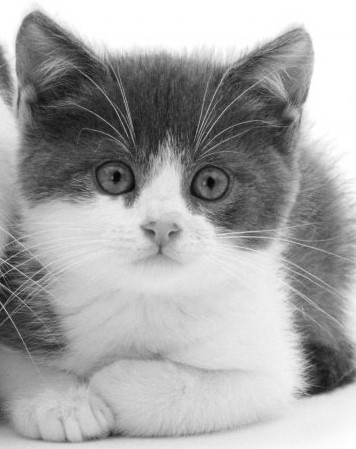

Ukuran Citra Template :  829  x  1024





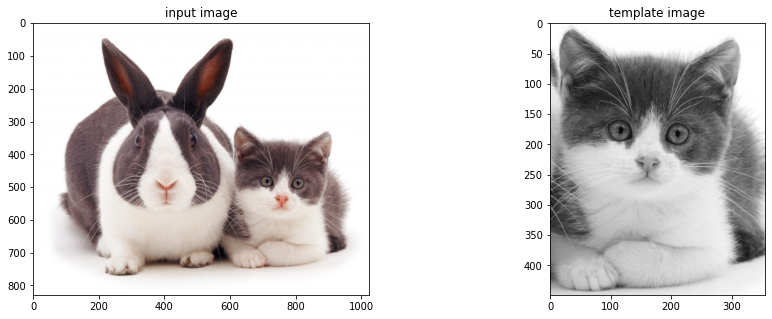

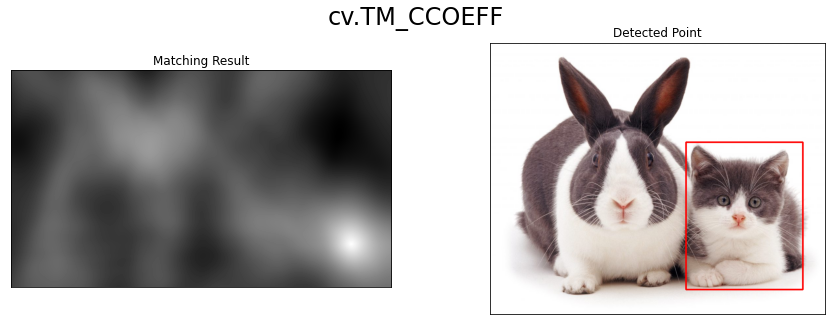

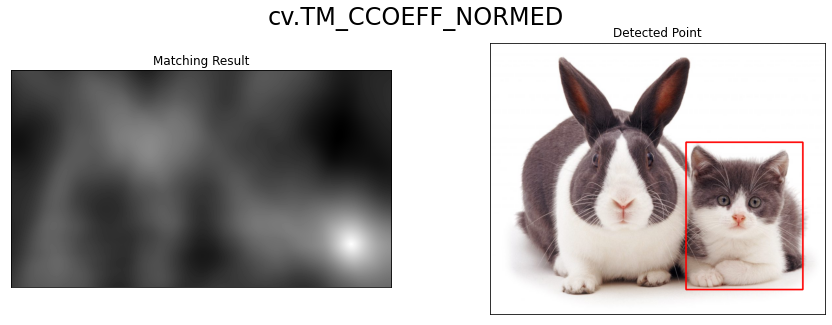

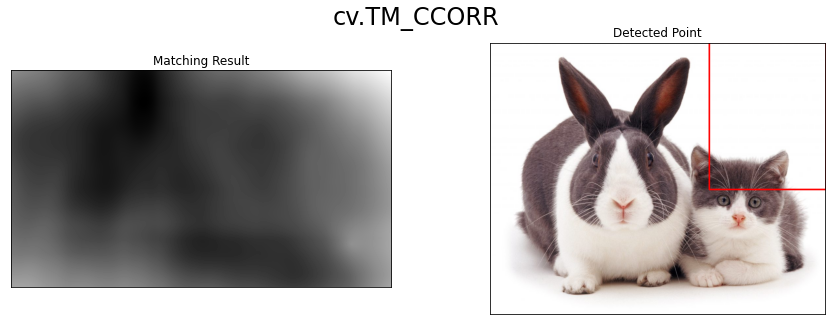

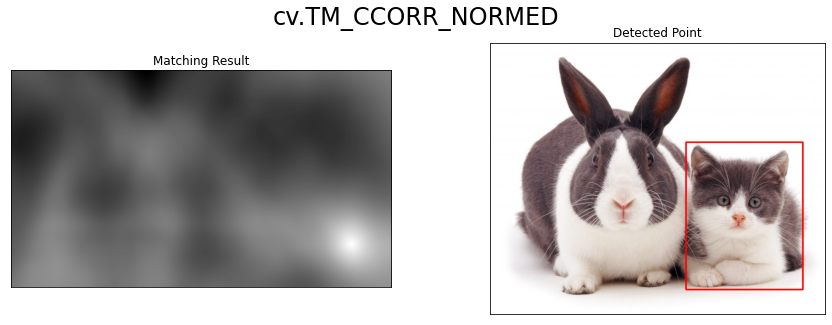

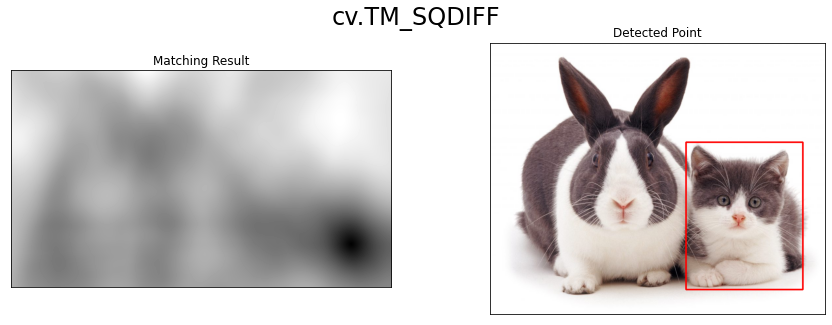

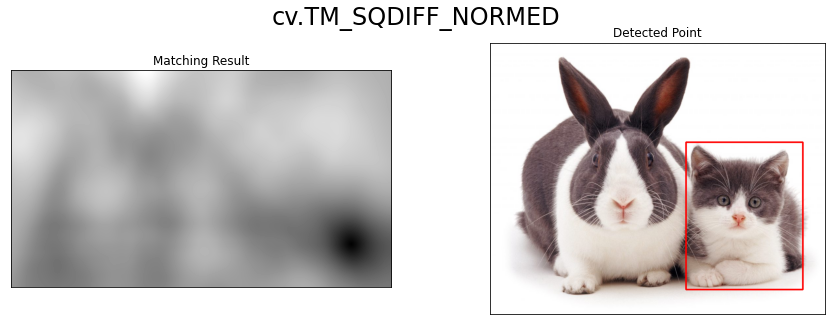

In [4]:
# load citra yang akan diinputkan
image = cv.imread('/content/drive/MyDrive/ObjectDetection/cats_and_bunnies.jpg')
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img2 = image.copy()

# load citra template
template = cv.imread('/content/drive/MyDrive/ObjectDetection/cat2_templatejpg.jpg', 0)
cv2_imshow(template)
tinggi = image.shape[0]
lebar = image.shape[1]
print("Ukuran Citra Template : ", tinggi, " x ", lebar)

# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt.subplots(1,2, figsize=(15, 5))  # membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")


# membuat array untuk menampung 6 jenis metode template matching yang disediakan oleh OpenCV
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# perulangan untuk setiap elemen yang ada di array methods
for metho in methods:
  image = img2.copy()
  method = eval(metho)

  # memanggil metode template matching
  res = cv.matchTemplate(image_gray, template, method)
  min_value, max_value, min_loc, max_loc = cv.minMaxLoc(res)

# jika method-nya TM_SQDIFF or TM_SQDIFF_NORMED, ambil nilai minimum
  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
  else:
        top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)


  cv.rectangle(image,top_left, bottom_right, (0, 0, 255), 3)
  plt.figure(figsize = (15, 5))

  plt.subplot(121), plt.imshow(res, cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  print("\n\n")
  plt.suptitle(metho, fontsize=24)

  plt.show()



Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar parking-lot-cars.jpg,
sehingga menghasilkan luaran sebagai berikut:

**A. Sobel Edge Detection**

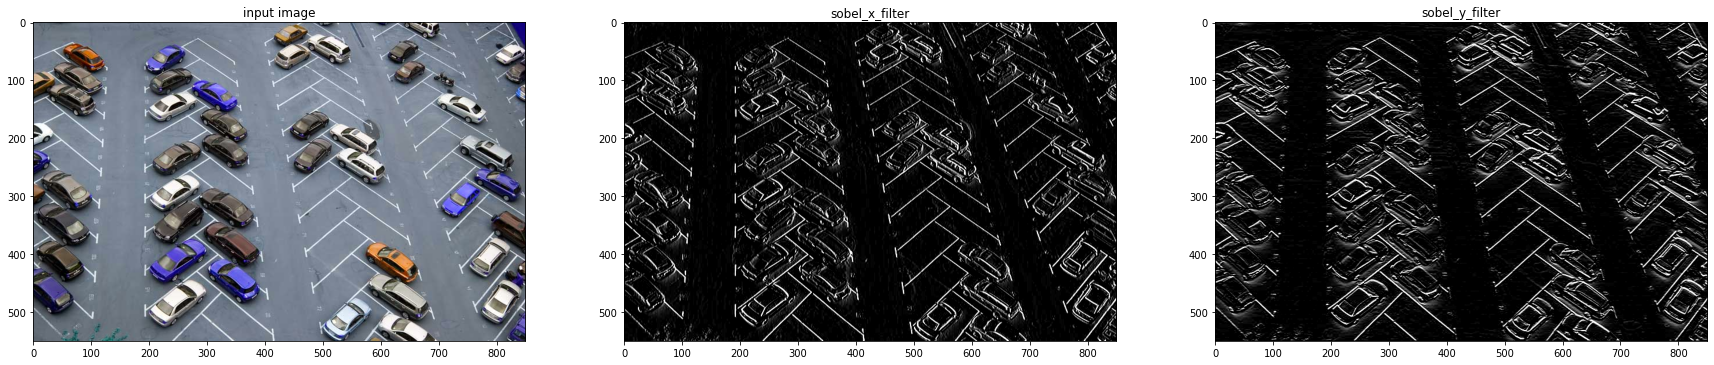

In [20]:
image = cv.imread('/content/drive/MyDrive/ObjectDetection/parking-lot-cars.jpg', cv.IMREAD_COLOR)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

filtered_image_y = cv.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv.filter2D(image_gray, -1, sobel_x)

f, axarr = plt.subplots(1,3, figsize=(30, 15)) 
axarr[0].imshow(image), axarr[0].set_title("input image")
axarr[1].imshow(filtered_image_x, cmap='gray'), axarr[1].set_title("sobel_x_filter")
axarr[2].imshow(filtered_image_y, cmap='gray'), axarr[2].set_title("sobel_y_filter")
plt.show()

**B. Canny Edge Detection**

(<matplotlib.image.AxesImage at 0x7f32bcdfde90>,
 Text(0.5, 1.0, 'Canny Edge Detection'))

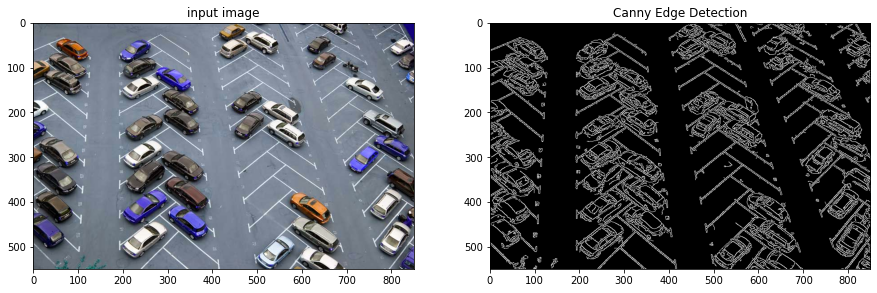

In [25]:
image = cv.imread('/content/drive/MyDrive/ObjectDetection/parking-lot-cars.jpg', cv.IMREAD_COLOR)

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
filtered_image = cv.Canny(image_gray, threshold1=50, threshold2=300)

f, axarr = plt.subplots(1,2, figsize=(15, 15)) 
axarr[0].imshow(image), axarr[0].set_title("input image")
axarr[1].imshow(filtered_image, cmap='gray'), axarr[1].set_title("Canny Edge Detection")


**C. Laplacian Edge Detection**

(<matplotlib.image.AxesImage at 0x7f32bc903690>,
 Text(0.5, 1.0, 'Laplacian Edge Detection'))

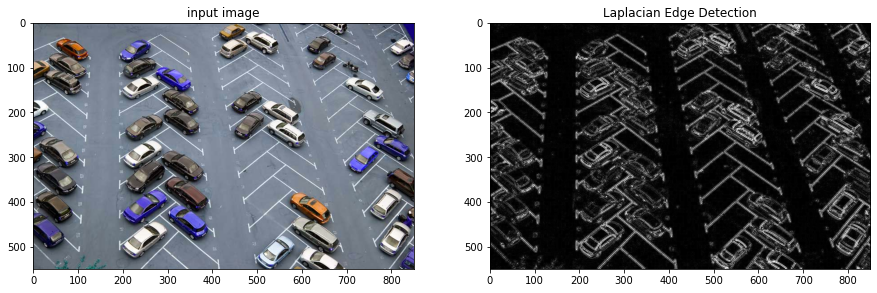

In [27]:
image = cv.imread('/content/drive/MyDrive/ObjectDetection/parking-lot-cars.jpg', cv.IMREAD_COLOR)

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(image_gray,(3,3),0)

filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_64F)
filtered_image = cv.convertScaleAbs(filtered_image)

f, axarr = plt.subplots(1,2, figsize=(15, 15)) 
axarr[0].imshow(image), axarr[0].set_title("input image")
axarr[1].imshow(filtered_image, cmap='gray'), axarr[1].set_title("Laplacian Edge Detection")

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

**A. Harris Corner Detection**

(Text(0.5, 1.0, 'Harris Corner Detection'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

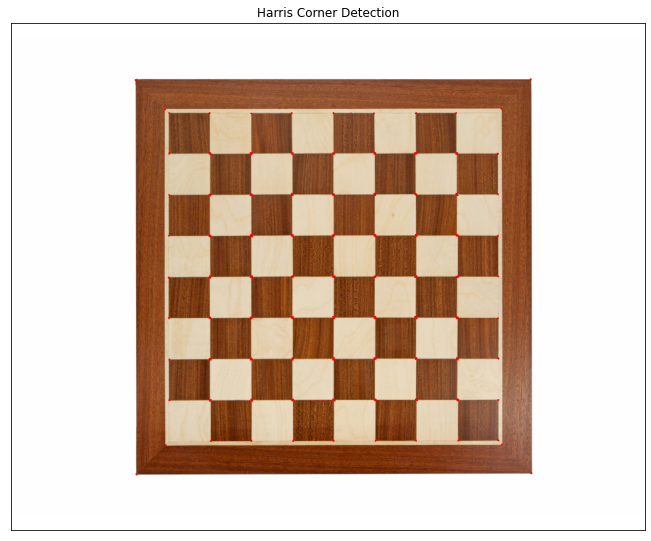

In [29]:
image = cv.imread('/content/drive/MyDrive/ObjectDetection/chess-board.jpg') 
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(img_gray, 3, 1, 0.04)

img_gray = np.float32(img_gray) 
harris_output = cv.cornerHarris(img_gray, 2, 3, 3)

#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_corner = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
image[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(25,10)) 
plt.subplot(122), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection'), plt.xticks([]), plt.yticks([])


**B. Shi-Tomasi Detection**

(Text(0.5, 1.0, 'Shi-Tomasi Detection'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

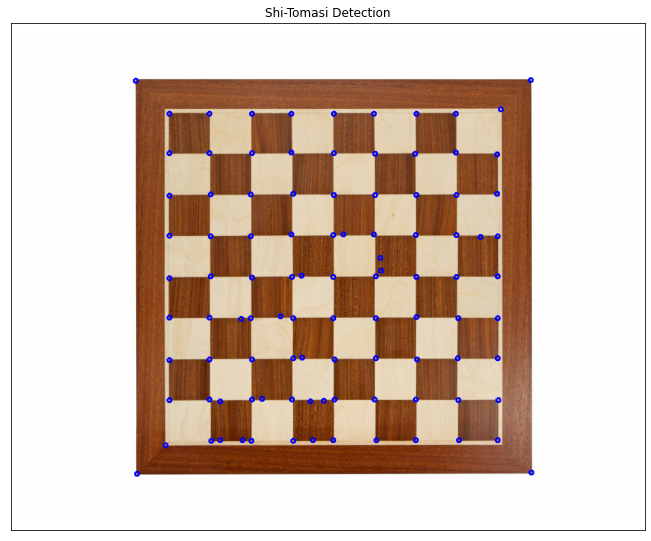

In [30]:
image = cv.imread('/content/drive/MyDrive/ObjectDetection/chess-board.jpg') 
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(img_gray, 100,0.01,10) 
corners = np. int0(corners)

for i in corners:
    x,y = i.ravel() 
    cv.circle(image, (x,y),3,255,2)

plt.figure(figsize=(25,10)) 
plt.subplot(122), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection'), plt.xticks([]), plt.yticks([])


Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


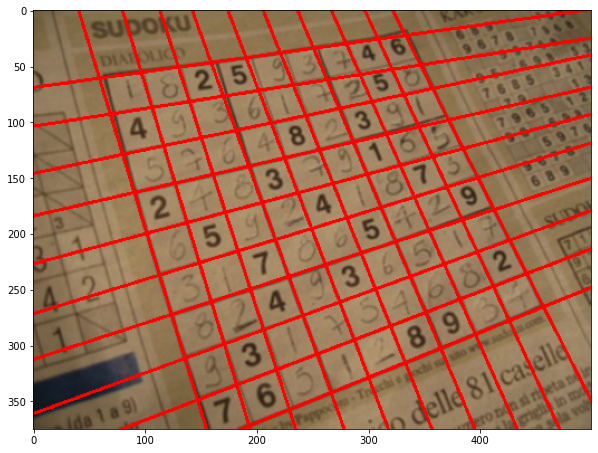

In [37]:
image = cv.imread('/content/drive/MyDrive/ObjectDetection/sudoku.jpg') 
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(image, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(10, 8)) 
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:


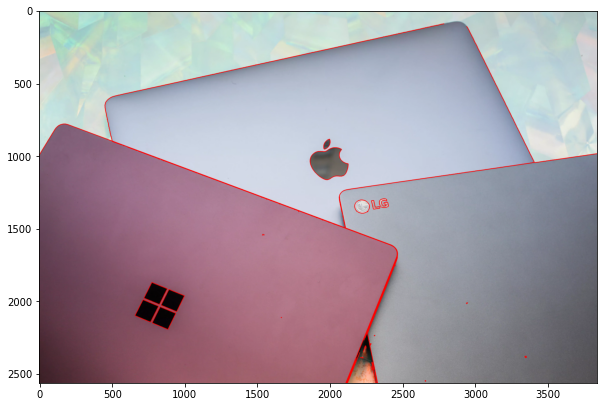

In [44]:
image = cv.imread('/content/drive/MyDrive/ObjectDetection/laptop.jpg') 
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(image, contours, -1, (0,0,255), 3)

plt.figure(figsize=(10, 8)) 
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

## **================== SELESAI ========================**